# Métodos numéricos
## Tarea 8
**Nombre:** Luis Enrique Pérez Señalin

In [1]:
import numpy as np
import sympy as sp
import pandas as pd
import matplotlib.pyplot as plt
import funciones

### Ejercicio 1

In [2]:
# Leer los datos de 1.csv para el ejercicio 1
filename = './datos/1.csv'
df1 = pd.read_csv(filename)
x, y = df1['x'],df1['y']
x_pred = np.linspace(x.min(),x.max(),100)

In [3]:
#a
solution_grado2, my_function = funciones.grado2(x, y)
print(f'{solution_grado2}')

{b0: -191.572418526473, b1: 71.6102437202353}


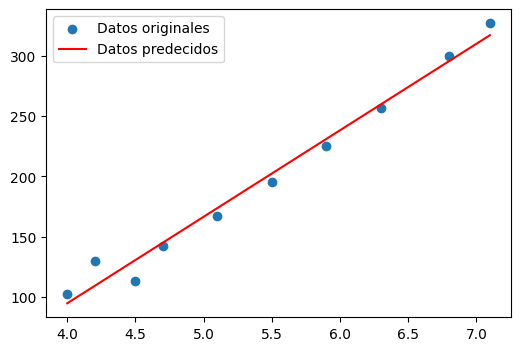

In [4]:
y_pred = my_function(x)
funciones.plot_points_line(x, y , x, y_pred)
del y_pred, my_function

In [5]:
#B
solution_grado3, my_function = funciones.grado3(x, y)
print(f'{solution_grado3}')

{a: 8.21707232027677, b: -19.3086037920577, c: 51.0007893901555}


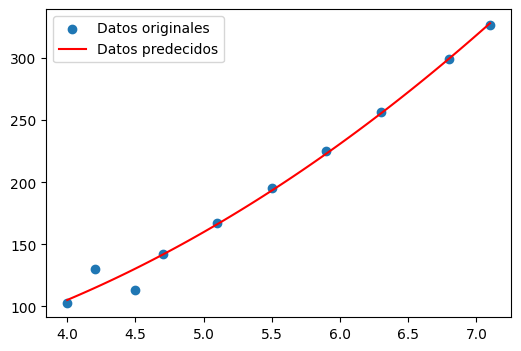

In [6]:
y_pred = my_function(x_pred)
funciones.plot_points_line(x, y , x_pred, y_pred)
del y_pred, my_function

In [7]:
#C
solution_grado4, my_function = funciones.grado4(x, y)
print(f'{solution_grado4}')

{a: -2.60683872291530, b: 51.5609569358385, c: -254.874783382474, d: 469.163265281457}


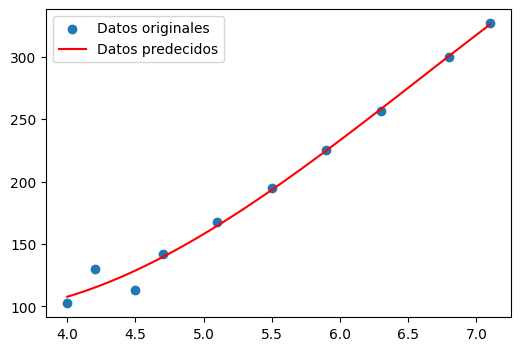

In [8]:
y_pred = my_function(x_pred)
funciones.plot_points_line(x, y , x_pred, y_pred)
del y_pred, my_function

In [9]:
#D
solution_d, my_function = funciones.resolver_d(x, y)
solution_d

{'a': 0.3684766238316912, 'b': 24.776723697838264}

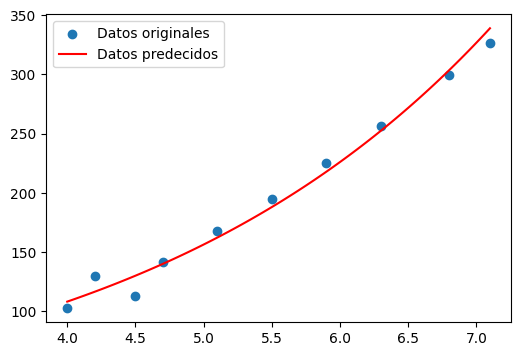

In [10]:
y_pred = my_function(x_pred)
funciones.plot_points_line(x, y, x_pred,y_pred)
del my_function, y_pred

**A.** Construya el polinomio por mínimos cuadrados de grado 1 y calcule el error.

Mínimos cuadrádos: <br>
$m = \frac{n(\sum{xy}) - (\sum{x})(\sum{y})}{n(\sum{x^2}) - (\sum{x})^2}$

In [11]:
del x, y, x_pred, df1

### Ejercicio 2

In [12]:
# Leer los datos de 2.csv para el ejercicio 2
filename = './datos/2.csv'
df2 = pd.read_csv(filename)
x, y = df2['x'],df2['y']
x_pred = np.linspace(x.min(),x.max(),100)

In [13]:
#a
solution_grado2, my_function = funciones.grado2(x, y)
print(f'{solution_grado2}')

{b0: -0.512456824000000, b1: 1.66554008000000}


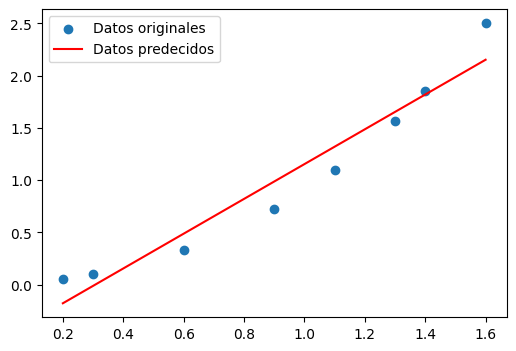

In [14]:
y_pred = my_function(x)
funciones.plot_points_line(x, y , x, y_pred)
del y_pred, my_function

In [15]:
#B
solution_grado3, my_function = funciones.grado3(x, y)
print(f'{solution_grado3}')

{a: 1.12942386701952, b: -0.311403456830963, c: 0.0851439325173668}


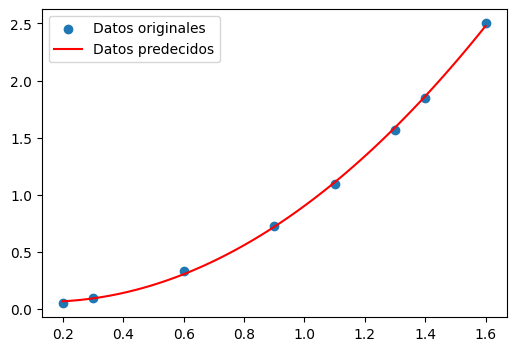

In [16]:
y_pred = my_function(x_pred)
funciones.plot_points_line(x, y , x_pred, y_pred)
del y_pred, my_function

In [17]:
#C
solution_grado4, my_function = funciones.grado4(x, y)
print(f'{solution_grado4}')

{a: 0.266208097739524, b: 0.402932213097654, c: 0.248385784190561, d: -0.0184013992962260}


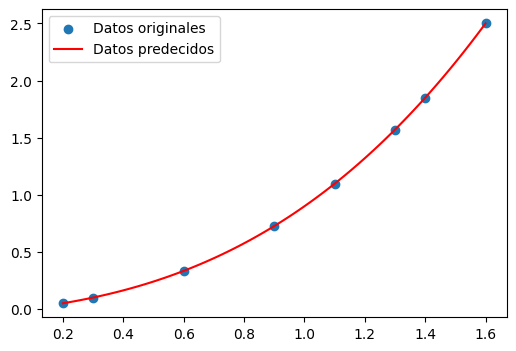

In [18]:
y_pred = my_function(x_pred)
funciones.plot_points_line(x, y , x_pred, y_pred)
del y_pred, my_function

In [19]:
#D
solution_d, my_function = funciones.resolver_d(x, y)
solution_d

{'a': 2.707294686913415, 'b': 0.045707480695330406}

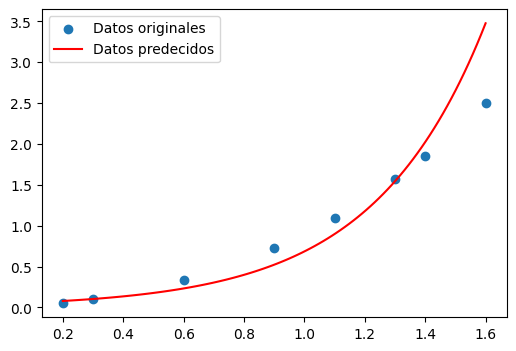

In [20]:
y_pred = my_function(x_pred)
funciones.plot_points_line(x, y , x_pred, y_pred)
del y_pred, my_function

### Ejercicio 3

In [21]:
# Leer los datos de 4.csv para el ejercicio 4
filename = './datos/3.csv'
df = pd.read_csv(filename)
df = df.sort_values(by = 'Puntuación ACT')
x = df['Puntuación ACT']
y = df['Promedio de puntos']
x_pred = np.linspace(x.min(),x.max(),100)

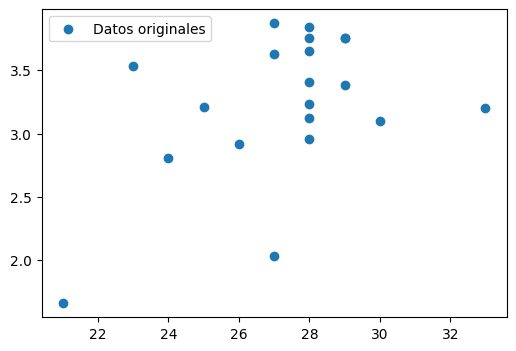

In [22]:
#Ordernar los valores de Puntuación.
funciones.plot_points(x, y)

In [23]:
solution, lineal_function = funciones.grado2(x, y)
print(f'b0 y b1:{solution}')

b0 y b1:{b0: 0.486575663026521, b1: 0.100858034321373}


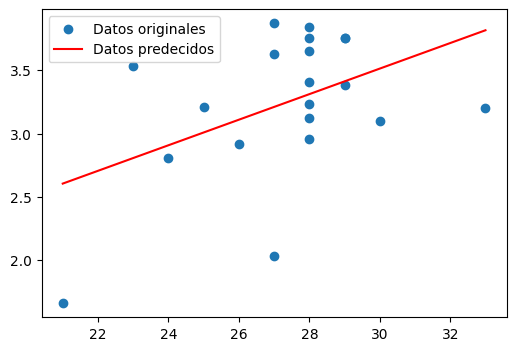

In [24]:
y_pred = lineal_function(x_pred)
# Set the grid to plot the values
funciones.plot_points_line(x, y, x_pred, y_pred)

### Ejercicio 4

In [25]:
# Leer los datos de 4.csv para el ejercicio 4
filename = './datos/4.csv'
df = pd.read_csv(filename)
df = df.sort_values(by = 'Peso promedio')
x = df['Peso promedio']
y = df['Porcentaje de presentación']
x_pred = np.linspace(x.min(),x.max(),100)

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U7'), dtype('float64')) -> None

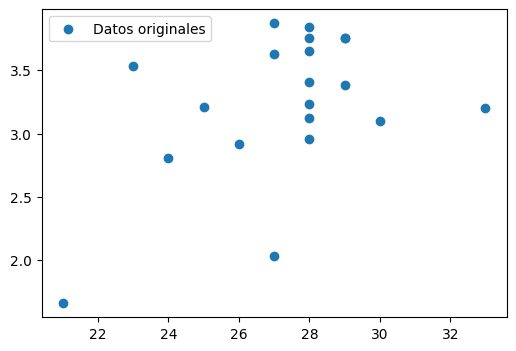

In [ ]:
#Ordernar los valores de Puntuación.
funciones.plot_points(x, y)